In [1]:
from copy import deepcopy

In [2]:
import numpy

In [3]:
import pandas

In [20]:
import pymp

In [4]:
from matplotlib import pyplot

In [5]:
pyplot.rcParams['figure.figsize'] = (16, 9)
pyplot.style.use('ggplot')

In [6]:
data = pandas.read_csv('xclara.csv')

In [7]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


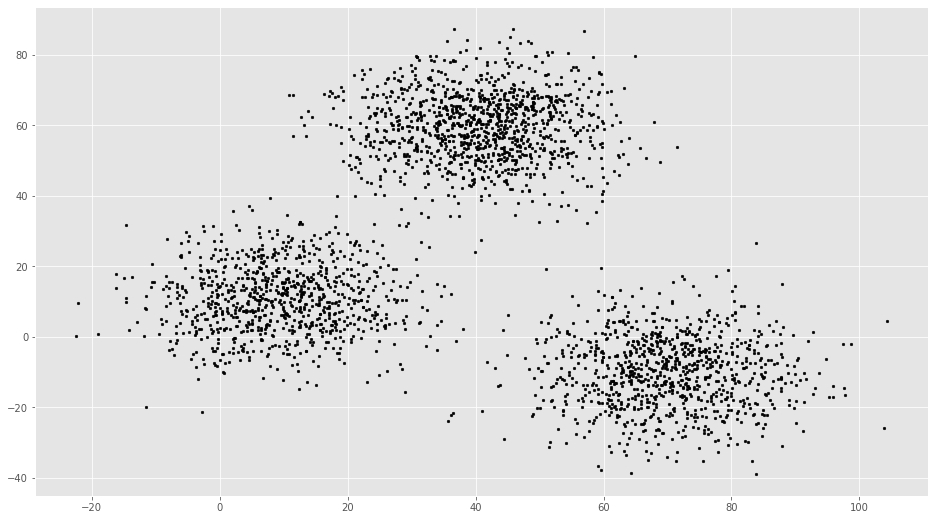

In [8]:
f1 = data['V1'].values
f2 = data['V2'].values
X = numpy.array(list(zip(f1, f2)))
pyplot.scatter(f1, f2, c='black', s=7)

In [9]:
def EuclideanDistance(a, b, ax=1):
    return numpy.linalg.norm(a - b, axis=ax)

In [10]:
k = 3
# X coordinates of random centroids
C_x = numpy.random.randint(0, numpy.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = numpy.random.randint(0, numpy.max(X)-20, size=k)
C = numpy.array(list(zip(C_x, C_y)), dtype=numpy.float32)

CPU times: user 55.5 ms, sys: 20 ms, total: 75.4 ms
Wall time: 55.5 ms


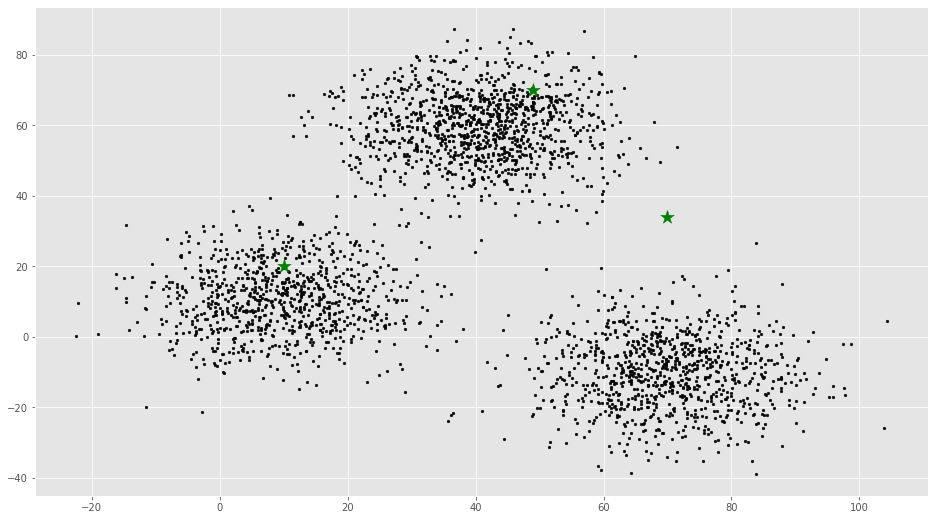

In [16]:
%%time
pyplot.scatter(f1, f2, c='#050505', s=7)
pyplot.scatter(C_x, C_y, marker='*', s=200, c='g')

In [14]:
%%time
C_old = numpy.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = numpy.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = EuclideanDistance(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = EuclideanDistance(X[i], C)
        cluster = numpy.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = numpy.mean(points, axis=0)
    error = EuclideanDistance(C, C_old, None)

CPU times: user 403 ms, sys: 34.8 ms, total: 437 ms
Wall time: 407 ms


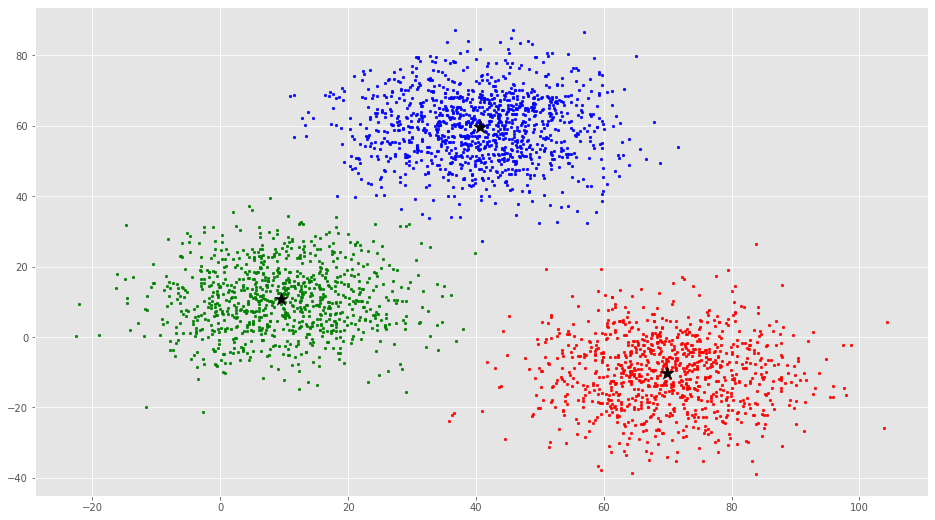

In [15]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = pyplot.subplots()
for i in range(k):
        points = numpy.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')